In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

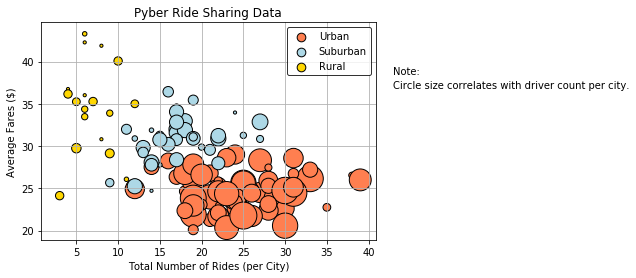

In [2]:
urban = combined_data.loc[combined_data["type"] == "Urban", :]
suburban = combined_data.loc[combined_data["type"] == "Suburban", :]
rural = combined_data.loc[combined_data["type"] == "Rural", :]

urban_count = urban.groupby('city').count()
urban_mean = urban.groupby('city').mean()
suburban_count = suburban.groupby('city').count()
suburban_mean = suburban.groupby('city').mean()
rural_count = rural.groupby('city').count()
rural_mean = rural.groupby('city').mean()

urban_x = urban_count.iloc[:,2]
urban_y = urban_mean.iloc[:,0]
urban_s = urban_mean.iloc[:,2]

suburban_x = suburban_count.iloc[:,2]
suburban_y = suburban_mean.iloc[:,0]
suburban_s = suburban_mean.iloc[:,2]

rural_x = rural_count.iloc[:,2]
rural_y = rural_mean.iloc[:,0]
rural_s = rural_mean.iloc[:,2]


urban_scatter = plt.scatter(urban_x, urban_y, s=urban_s*10, label = "Urban", 
                            color=["coral"], marker="o", edgecolor="black")
suburban_scatter = plt.scatter(suburban_x, suburban_y, s=suburban_s * 10, label = "Suburban", 
                               color=["lightblue"], marker="o", edgecolor="black")
rural_scatter = plt.scatter(rural_x, rural_y, s=rural_s * 10, label = "Rural", 
                            color=["gold"], marker="o", edgecolor="black")

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fares ($)")

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

textstr = ('Note:')
plt.text(.94, 0.7, textstr, fontsize=10, transform=plt.gcf().transFigure)
textstr = ('Circle size correlates with driver count per city.')
plt.text(.94, 0.65, textstr, fontsize=10, transform=plt.gcf().transFigure)

plt.grid(b=True)

plt.show()

## Total Fares by City Type

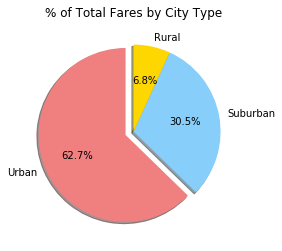

In [3]:
all_sum = combined_data.sum()
urban_sum = urban.sum()
suburban_sum = suburban.sum()
rural_sum = rural.sum()

urban_fare = ((urban_sum[2])/(all_sum[2]))*100
suburban_fare = ((suburban_sum[2])/(all_sum[2]))*100
rural_fare = ((rural_sum[2])/(all_sum[2]))*100

fare_pie_chart = [urban_fare, suburban_fare, rural_fare]
fare_pie_labels = ["Urban", "Suburban", "Rural"]
explode = (0.1, 0, 0)
colors = ["lightcoral", "lightskyblue", "gold"]

plt.pie(fare_pie_chart, explode=explode, labels=fare_pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.title("% of Total Fares by City Type")

plt.show()

## Total Rides by City Type

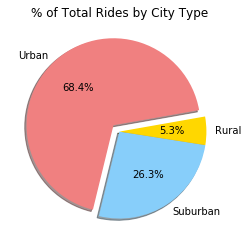

In [4]:
grouped_rides = combined_data.groupby('type').count()
urban_rides = grouped_rides.iloc[2,2]
suburban_rides = grouped_rides.iloc[1,2]
rural_rides = grouped_rides.iloc[0,2]

all_r = grouped_rides.sum()
all_rides = all_r[3]

percent_urban = (urban_rides/all_rides)*100
percent_suburban = (suburban_rides/all_rides)*100
percent_rural = (rural_rides/all_rides)*100

ride_pie_chart = [percent_urban, percent_suburban, percent_rural]
ride_pie_labels = ["Urban", "Suburban", "Rural"]
explode = (0.1, 0, 0)
colors = ["lightcoral", "lightskyblue", "gold"]

plt.pie(ride_pie_chart, explode=explode, labels=ride_pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=10)

plt.title("% of Total Rides by City Type")

plt.show()

## Total Drivers by City Type

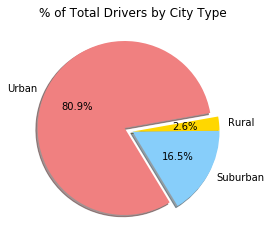

In [5]:
urban_driver = city_data.loc[city_data["type"] == "Urban", :]
urban_driver_all = urban_driver.sum()

suburban_driver = city_data.loc[city_data["type"] == "Suburban", :]
suburban_driver_all = suburban_driver.sum()

rural_driver = city_data.loc[city_data["type"] == "Rural", :]
rural_driver_all = rural_driver.sum()

total_driver = city_data.sum()

urban_drivers_type = ((urban_driver_all[1])/(total_driver[1]))*100
suburban_drivers_type = ((suburban_driver_all[1])/(total_driver[1]))*100
rural_drivers_type = ((rural_driver_all[1])/(total_driver[1]))*100

total_driver[1]

driver_pie_chart = [urban_drivers_type, suburban_drivers_type, rural_drivers_type]
driver_pie_labels = ["Urban", "Suburban", "Rural"]
explode = (0.1, 0, 0)
colors = ["lightcoral", "lightskyblue", "gold"]

plt.pie(driver_pie_chart, explode=explode, labels=driver_pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=10)

plt.title("% of Total Drivers by City Type")

plt.show()

Three observations: 
1. Majority of drivers are Urban drivers
2. Rural fares appear to be the most expensive 
3. Urabn cities have the greatest demand for rides 